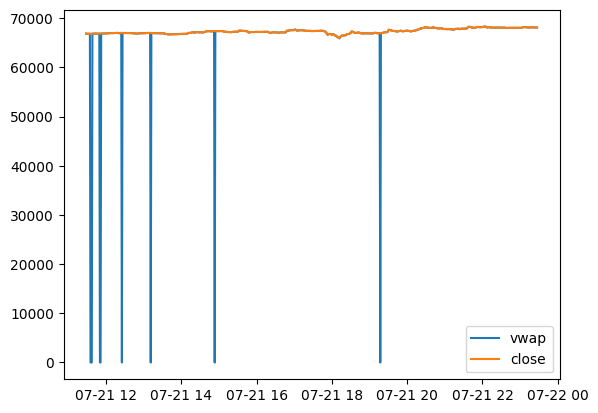

                   time     open     high      low    close     vwap  \
0   2024-07-21 11:28:00  66846.0  66846.1  66846.0  66846.0  66846.0   
1   2024-07-21 11:29:00  66846.0  66846.0  66846.0  66846.0  66846.0   
2   2024-07-21 11:30:00  66846.0  66846.0  66810.6  66810.6  66840.7   
3   2024-07-21 11:31:00  66810.7  66810.7  66810.7  66810.7  66810.7   
4   2024-07-21 11:32:00  66810.6  66825.0  66810.6  66825.0  66818.5   
..                  ...      ...      ...      ...      ...      ...   
715 2024-07-21 23:23:00  68101.6  68101.6  68101.5  68101.5  68101.5   
716 2024-07-21 23:24:00  68101.5  68101.6  68101.5  68101.5  68101.5   
717 2024-07-21 23:25:00  68101.5  68101.6  68101.5  68101.6  68101.5   
718 2024-07-21 23:26:00  68101.5  68101.6  68093.4  68093.4  68099.9   
719 2024-07-21 23:27:00  68093.4  68093.4  68093.4  68093.4  68093.4   

     candle_volume  count     asset  
0         0.008886     11  XXBTZUSD  
1         0.000936      2  XXBTZUSD  
2         1.347887   

In [10]:
# install pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# install requests to get data from api
import requests
import json

# what have the hightest volume from Kraken api https://api.kraken.com/0/public/Ticker, v string[] Volume [<today>, <last 24 hours>]
# c string[] Last trade closed [<price>, <lot volume>] is the price currently traded at and the volume of the last trade
# data = requests.get('https://api.kraken.com/0/public/Ticker')
# # calculate the 24hr volume in $dollars for each ticker with the v[1] * c[0] and call it 24hr_dollar_volume
# data = data.json()
# df = pd.DataFrame(data['result'])
# df = df.T
# df = df.reset_index()
# df = df.rename(columns={'index': 'ticker'})
# # c and v convert to floats before multiplying
# df['24hr_dollar_volume'] = df.apply(lambda row: float(row['v'][1]) * float(row['c'][0]), axis=1)
# # sort the 24hr_dollar_volume in descending order
# df = df.sort_values('24hr_dollar_volume', ascending=False)
# # print the top 10 24hr_dollar_volume, just the ticker and 24hr_dollar_volume
# print(df[['ticker', '24hr_dollar_volume']].head(10))



# what assets to get data from Kraken api
assets = ['XXBTZUSD']

# get the ohlc data from https://api.kraken.com/0/public/OHLC
# data includes a list of lists with the following type/sequence: int <time>, string <open>, string <high>, string <low>, string <close>, string <vwap>, string <volume>, int <count>
# create a dataframe to store the data of nested lists in result[asset]
ohlc_df = pd.DataFrame()
for asset in assets:
    data = requests.get(f'https://api.kraken.com/0/public/OHLC?pair={asset}&interval=1')
    data = data.json()
    data = data['result'][asset]
    # make the data into a data frame
    data = pd.DataFrame(data)
    # append the data frame to the main data frame
    # concate this data frame to the main data df
    ohlc_df = pd.concat([ohlc_df, data])

# name the columns time, open, high, low, close, vwap, volume, count, asset
ohlc_df.columns = ['time', 'open', 'high', 'low', 'close', 'vwap', 'candle_volume', 'count']
# convert the time to a datetime object
ohlc_df['time'] = pd.to_datetime(ohlc_df['time'], unit='s')
# convert the rest of the columns to floats
ohlc_df['open'] = ohlc_df['open'].astype(float)
ohlc_df['high'] = ohlc_df['high'].astype(float)
ohlc_df['low'] = ohlc_df['low'].astype(float)
ohlc_df['close'] = ohlc_df['close'].astype(float)
ohlc_df['vwap'] = ohlc_df['vwap'].astype(float)
ohlc_df['candle_volume'] = ohlc_df['candle_volume'].astype(float)
ohlc_df['count'] = ohlc_df['count'].astype(int)
ohlc_df['asset'] = asset


# calculate my own vwap
vwap = sum(ohlc_df['close'] * ohlc_df['candle_volume']) / sum(ohlc_df['candle_volume'])
# plot the vwap, ohlc_vwap and close price of the candle
plt.plot(ohlc_df['time'], ohlc_df['vwap'], label='vwap')

# plt.plot(df['time'], df['vwap'], label='vwap')
plt.plot(ohlc_df['time'], ohlc_df['close'], label='close')
plt.legend()
plt.show()

print(ohlc_df)



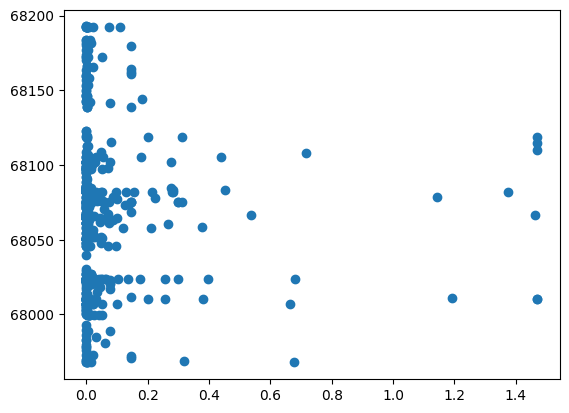

Epoch 1/100
 1/80 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - loss: 4630163456.0000

/Users/andrewdiedrich/Documents/quant/slingbot/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 4632349696.0000 
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 4632518656.0000
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 4632690688.0000
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 4632576512.0000
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 4632024576.0000
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 4632543232.0000
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 4632141312.0000
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 4632068608.0000
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 4632411648.0000
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 4632203264.0000
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 4632420864.0000
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 4632074240.0000
Epoch 13/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 4632194560.0000
Epoch 

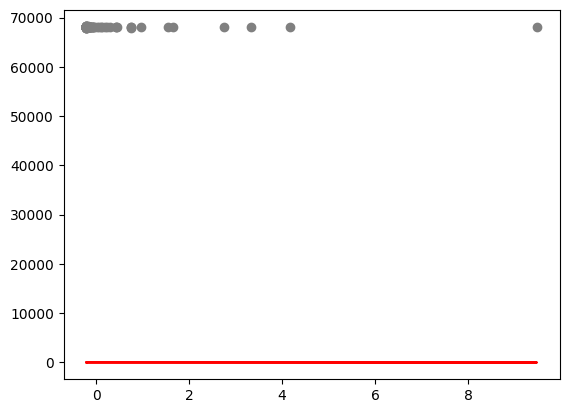

[[ 8.266252 ]
 [ 8.256805 ]
 [ 8.266753 ]
 [ 8.266609 ]
 [ 8.256809 ]
 [ 7.628054 ]
 [ 8.266252 ]
 [ 8.266638 ]
 [ 8.267916 ]
 [ 8.268359 ]
 [ 8.246772 ]
 [ 8.208586 ]
 [ 8.268361 ]
 [ 8.252845 ]
 [ 8.266252 ]
 [ 8.251515 ]
 [ 8.244623 ]
 [ 8.219667 ]
 [ 8.265177 ]
 [ 8.266614 ]
 [ 8.268357 ]
 [ 8.208354 ]
 [ 8.254311 ]
 [ 8.267911 ]
 [ 8.246443 ]
 [ 8.26791  ]
 [ 8.268773 ]
 [ 8.254701 ]
 [ 8.264482 ]
 [ 8.263468 ]
 [ 8.266252 ]
 [ 7.853646 ]
 [ 7.472355 ]
 [ 8.238653 ]
 [ 8.268377 ]
 [ 8.268614 ]
 [ 7.0477448]
 [ 4.519043 ]
 [ 8.264787 ]
 [ 8.267368 ]
 [ 8.267616 ]
 [ 8.268361 ]
 [ 8.156796 ]
 [ 8.24472  ]
 [ 8.268357 ]
 [ 8.245135 ]
 [ 8.266252 ]
 [ 8.2277975]
 [ 8.236055 ]
 [ 8.267919 ]
 [ 7.466612 ]
 [ 8.266403 ]
 [ 8.257164 ]
 [ 8.266252 ]
 [ 6.779798 ]
 [ 8.256543 ]
 [ 8.265302 ]
 [ 8.264599 ]
 [ 8.190145 ]
 [ 8.268747 ]
 [ 8.268357 ]
 [ 8.267111 ]
 [ 8.268014 ]
 [ 8.26767  ]
 [ 8.268357 ]
 [ 8.26662  ]
 [ 8.268747 ]
 [ 8.268431 ]
 [ 8.103206 ]
 [ 8.261325 ]
 [ 8.244623 ]
 [ 8.2

ValueError: Data must be 1-dimensional, got ndarray of shape (200, 200) instead

In [10]:
# use tensorflow to predict the price of the asset
# install tensorflow/
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# use holc data to predict the price of the asset





